In [47]:
import numpy as np

import matplotlib.pyplot as plt

In [17]:
d = 1000
A_diag = np.exp(np.random.normal(size=(d)))

In [18]:
A_diag.mean(), np.exp(np.log(A_diag).mean())

(np.float64(1.6949800788650446), np.float64(0.9973603200322416))

In [19]:
np.exp(1/2)

np.float64(1.6487212707001282)

In [15]:
A = np.diag(A_diag)

$$
f(x) = x^T A x \\
\text{want: volume where} f(x) < 1 \\
\text{axis radii:} A_i r_i^2 = 1 \\
r_i = A_i^{-1/2}\\
vol \sim \prod_i r_i = \exp(-1/2 \sum_i \log A_i)\\
logvol = -1/2 \sum_i \log A_i + C\\
\approx -\tfrac d2 E[\log A_i] + C
$$

Naive estimator:
$$
u_i \sim N(0, 1/d)\\
x_i = r u_i\\
f(x) = x_i A_ij x_j = \sum_i A_i x_i^2\\
\approx  \sum_i A_i r^2 / d = 1\\
r \approx \sqrt{d / \sum_i A_i}\\
\approx \sqrt{1 / E[A_i]}\\
\log r \approx -1/2 \log E[A_i]\\
logvol = d \log r + C \approx -\tfrac d2 \log E[A_i] + C
$$

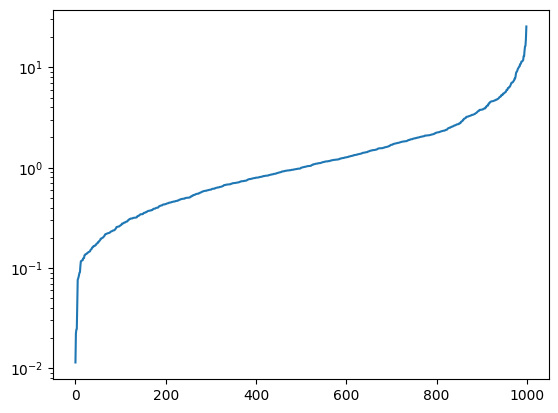

In [50]:
plt.plot(np.sort(A_diag))
plt.yscale('log')
plt.show()

# Estimators

Spherical

In [44]:
n_samples = 10_000
vecs = np.random.normal(size=(n_samples, d))
vecs /= np.linalg.norm(vecs, axis=1, keepdims=True)
unscaled_f = np.sum(A_diag * vecs**2, axis=1)
print(unscaled_f.mean(), unscaled_f.std(), A_diag.mean())
r_squared = 1 / unscaled_f
r = np.sqrt(r_squared)
print(r.mean(), r.std(), np.log(r).mean(), np.log(r).std())
logvol = d * np.log(r)
logvol.mean(), logvol.std(), logvol.std() / np.sqrt(n_samples)

1.6938282186236218 0.09976510158544534 1.6949800788650446
0.769348754034222 0.022423761619716504 -0.26263728867901676 0.029233769165452724


(np.float64(-262.6372886790168),
 np.float64(29.233769165452724),
 np.float64(0.2923376916545272))

Axis-aligned

In [46]:
logvol = -d/2 * np.log(A_diag)
logvol.mean(), logvol.std()

(np.float64(1.3215850330529575), np.float64(517.390097144195))

In [45]:
-d/2 * np.log(np.mean(A_diag))

np.float64(-263.83549394068416)

In [38]:
-d/2 * np.log(A_diag).mean()

np.float64(1.3215850330529575)

In [40]:
# large d limit of naive spherical estimator
-d/2 * (1/2)

-250.0

In [41]:
# large d limit of axis-aligned estimator
-d/2 * 0

-0.0